In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

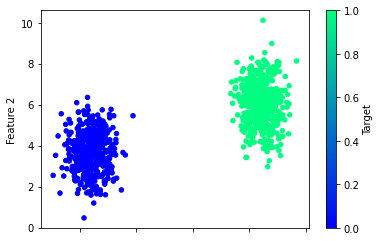

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 708us/step - loss: 0.5901 - accuracy: 0.9973
Epoch 2/100
24/24 [==============================] - 0s 708us/step - loss: 0.5734 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 750us/step - loss: 0.5566 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 708us/step - loss: 0.5400 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 705us/step - loss: 0.5237 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 708us/step - loss: 0.5075 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 708us/step - loss: 0.4917 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 625us/step - loss: 0.4761 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 666us/step - loss: 0.4610 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 708us/step - loss: 0.4463 - accura

24/24 [==============================] - 0s 708us/step - loss: 0.0935 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 750us/step - loss: 0.0921 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 791us/step - loss: 0.0906 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 750us/step - loss: 0.0892 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 791us/step - loss: 0.0879 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 791us/step - loss: 0.0865 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 750us/step - loss: 0.0852 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 750us/step - loss: 0.0839 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 708us/step - loss: 0.0826 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 750us/step - loss: 0.0814 - accuracy: 

# Displaying our loss and accuracy over epochs

8/8 - 0s - loss: 0.0656 - accuracy: 1.0000
---------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------

Loss: 0.06563994288444519, Accuracy: 1.0

---------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------



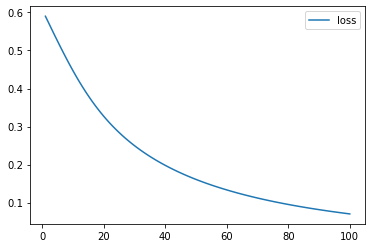

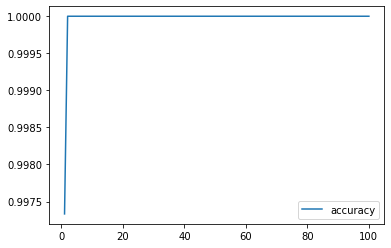

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
display(history_df.plot(y="loss"))

# Plot the accuracy
display(history_df.plot(y="accuracy"))

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(('-'*123 + '\n')*3)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
print('\n' + ('-'*123 + '\n')*3)

In [12]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

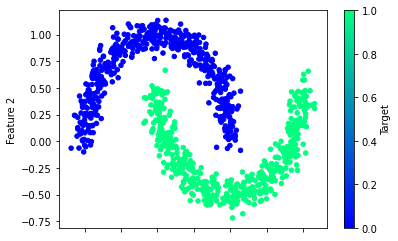

In [13]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9294 - accuracy: 0.5387
Epoch 2/100
24/24 [==============================] - 0s 1000us/step - loss: 0.8064 - accuracy: 0.5720
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7243 - accuracy: 0.6000
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.6253
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6237 - accuracy: 0.6453
Epoch 6/100
24/24 [==============================] - 0s 1000us/step - loss: 0.5896 - accuracy: 0.6613
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5608 - accuracy: 0.6707
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5353 - accuracy: 0.6853
Epoch 9/100
24/24 [==============================] - 0s 916us/step - loss: 0.5138 - accuracy: 0.6973
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.7067
E

24/24 [==============================] - 0s 1ms/step - loss: 0.2618 - accuracy: 0.8907
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2615 - accuracy: 0.8907
Epoch 84/100
24/24 [==============================] - 0s 1000us/step - loss: 0.2613 - accuracy: 0.8907
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2610 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2608 - accuracy: 0.8907
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2605 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 1000us/step - loss: 0.2602 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 1000us/step - loss: 0.2600 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2597 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 1000us/step - loss: 0.2595 - accuracy: 0.8920
E

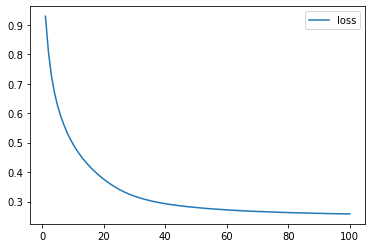

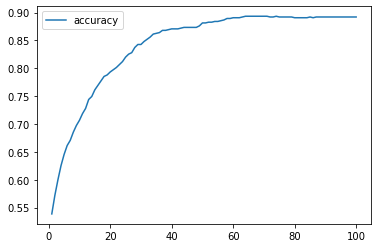

In [14]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
display(history_df.plot(y="loss"))

# Plot the loss
display(history_df.plot(y="accuracy"))

Epoch 1/100
24/24 [==============================] - 0s 708us/step - loss: 0.7199 - accuracy: 0.5307
Epoch 2/100
24/24 [==============================] - 0s 708us/step - loss: 0.6753 - accuracy: 0.5307
Epoch 3/100
24/24 [==============================] - 0s 750us/step - loss: 0.6363 - accuracy: 0.5227
Epoch 4/100
24/24 [==============================] - 0s 650us/step - loss: 0.6032 - accuracy: 0.5120
Epoch 5/100
24/24 [==============================] - 0s 708us/step - loss: 0.5745 - accuracy: 0.5427
Epoch 6/100
24/24 [==============================] - 0s 750us/step - loss: 0.5496 - accuracy: 0.5600
Epoch 7/100
24/24 [==============================] - 0s 708us/step - loss: 0.5283 - accuracy: 0.5827
Epoch 8/100
24/24 [==============================] - 0s 750us/step - loss: 0.5096 - accuracy: 0.6107
Epoch 9/100
24/24 [==============================] - 0s 719us/step - loss: 0.4934 - accuracy: 0.6240
Epoch 10/100
24/24 [==============================] - 0s 791us/step - loss: 0.4792 - accura

24/24 [==============================] - 0s 708us/step - loss: 0.2846 - accuracy: 0.8987
Epoch 82/100
24/24 [==============================] - 0s 875us/step - loss: 0.2836 - accuracy: 0.8973
Epoch 83/100
24/24 [==============================] - 0s 875us/step - loss: 0.2827 - accuracy: 0.8973
Epoch 84/100
24/24 [==============================] - 0s 708us/step - loss: 0.2818 - accuracy: 0.8973
Epoch 85/100
24/24 [==============================] - 0s 833us/step - loss: 0.2810 - accuracy: 0.8973
Epoch 86/100
24/24 [==============================] - 0s 750us/step - loss: 0.2800 - accuracy: 0.8973
Epoch 87/100
24/24 [==============================] - 0s 875us/step - loss: 0.2793 - accuracy: 0.8973
Epoch 88/100
24/24 [==============================] - 0s 750us/step - loss: 0.2784 - accuracy: 0.8973
Epoch 89/100
24/24 [==============================] - 0s 750us/step - loss: 0.2775 - accuracy: 0.8973
Epoch 90/100
24/24 [==============================] - 0s 666us/step - loss: 0.2767 - accuracy: 

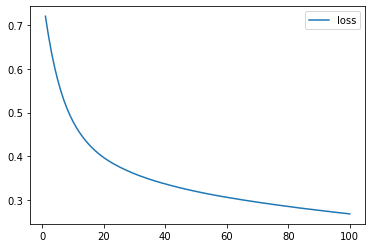

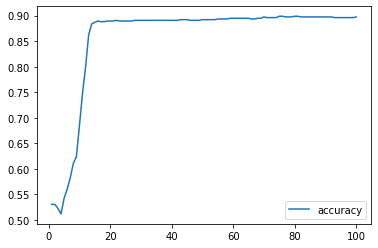

In [16]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

# Create a DataFrame containing training history
history_df = pd.DataFrame(new_fit_model.history, index=range(1,len(new_fit_model.history["loss"])+1))

# Plot the loss
display(history_df.plot(y="loss"))

# Plot the loss
display(history_df.plot(y="accuracy"))